<a href="https://colab.research.google.com/github/nicchic/NLP/blob/main/LDA_mental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyLDAvis gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 18.3 MB/s eta 0:00:00


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle
import pandas as pd
import os
import re
import string

from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
import gensim.corpora as corpora               #mapping words to integers
import warnings

warnings.filterwarnings("ignore")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
pip install datasets

In [ ]:
from datasets import load_dataset

ds = load_dataset("Amod/mental_health_counseling_conversations")


In [ ]:
text = pd.DataFrame(ds['train'])

text.head(10)

,Context,Response
0,I'm going through some things with my feelings...,"If everyone thinks you're worthless, then mayb..."
1,I'm going through some things with my feelings...,"Hello, and thank you for your question and see..."
2,I'm going through some things with my feelings...,First thing I'd suggest is getting the sleep y...
3,I'm going through some things with my feelings...,Therapy is essential for those that are feelin...
4,I'm going through some things with my feelings...,I first want to let you know that you are not ...
5,I'm going through some things with my feelings...,"Heck, sure thing, hun!Feelings of 'depression'..."
6,I'm going through some things with my feelings...,You are exhibiting some specific traits of a p...
7,I'm going through some things with my feelings...,That is intense. Depression is a liar. Sometim...
8,I'm going through some things with my feelings...,It sounds like you may be putting yourself las...
9,I'm going through some things with my feelings...,It must be really difficult to experience what...


In [ ]:
#remove punctuation and lowercase

text['context_processed'] = text['Context'].map(lambda x: re.sub('[^\w\s]', '', x).lower())

text['response_processed'] = text['Response'].map(lambda x: re.sub('[^\w\s]', '', x).lower())



In [ ]:
# combine 2 columns into same text

text['combined_processed'] = text['context_processed'] + " " + text['response_processed']

text['combined_processed'].head()

text_data = ' '.join(text['combined_processed'].values)

# remove stop words

stop_words = set(stopwords.words('english'))


text_data_no_stopwords = ' '.join([word for word in text_data.split() if word not in stop_words])

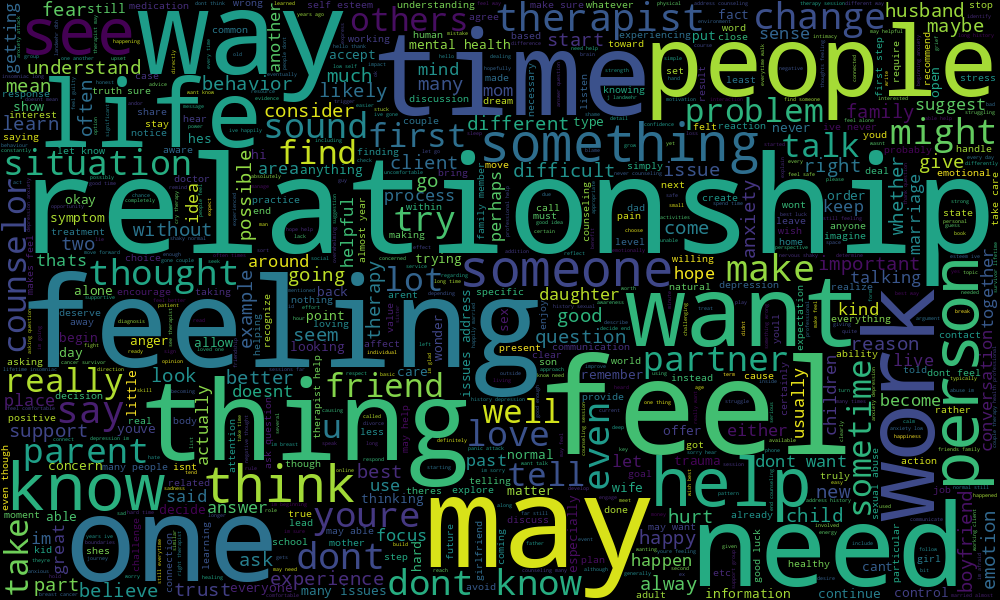

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    background_color="black",   # Set background color to black
    max_words=5000,             # Set the maximum number of words to include in the word cloud
    width=1000,                  # Set the width of the canvas
    height=600,
    contour_width=3,
    #colormap="Blues",
    contour_color='steelblue'
).generate(text_data_no_stopwords)

wordcloud.to_image()

             Word  Frequency
64           feel       3912
98           like       3390
78            may       2921
0              im       2709
134          help       2676
385         would       2644
254          know       2555
350          time       2512
144          dont       2448
649  relationship       2405
252          want       2297
19            get       2228
30         people       2191
106           one       1872
425     therapist       1830


<Figure size 1000x800 with 0 Axes>

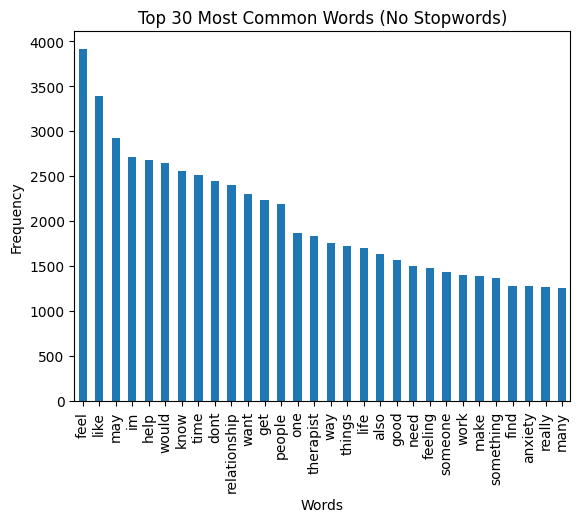

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Generate the word frequency distribution after removing stopwords
words_no_stopwords = text_data_no_stopwords.split()
word_freq_no_stopwords = Counter(words_no_stopwords)

# Convert the word frequency distribution to a DataFrame
word_freq_df_no_stopwords = pd.DataFrame(word_freq_no_stopwords.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Display the top 10 most common words after stopword removal
print(word_freq_df_no_stopwords.head(15))

# Plot the top 20 most common words as a bar chart after stopword removal
plt.figure(figsize=(10, 8))
word_freq_df_no_stopwords.head(30).plot(kind='bar', x='Word', y='Frequency', legend=False)
plt.title("Top 30 Most Common Words (No Stopwords)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Tokenize the text
text['tokens'] = text['combined_processed'].apply(lambda x: [word for word in x.split() if word not in stop_words])

# create a dictionary
dictionary = corpora.Dictionary(text['tokens'])


# convert tokenized text into bag-of-words corpus
corpus = [dictionary.doc2bow(tokens) for tokens in text['tokens']]


# Word to ID mapping
print("Dictionary (first 10 entries):")
print(list(dictionary.items())[:10])

# Bag-of-words representation of the first document
print("\nCorpus Sample (first document):")
print(corpus[1])


Dictionary (first 10 entries):
[(0, 'againthere'), (1, 'always'), (2, 'around'), (3, 'back'), (4, 'barely'), (5, 'belief'), (6, 'better'), (7, 'big'), (8, 'change'), (9, 'contemplated')]

Corpus Sample (first document):
[(1, 1), (2, 1), (4, 1), (8, 4), (9, 1), (14, 1), (15, 1), (16, 1), (17, 4), (19, 1), (20, 1), (22, 1), (23, 1), (27, 2), (30, 1), (31, 2), (36, 1), (37, 2), (44, 1), (45, 2), (46, 1), (47, 1), (48, 1), (50, 5), (53, 1), (60, 1), (63, 1), (68, 2), (71, 2), (72, 2), (75, 2), (76, 1), (79, 1), (81, 2), (82, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 2), (94, 1), (95, 1), (96, 2), (97, 1), (98, 1), (99, 2), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 2), (111, 1), (112, 1), (113, 1), (114, 2), (115, 1), (116, 1), (117, 1), (118, 1), (119, 1), (120, 1), (121, 1), (122, 1), (123, 1), (124, 1), (125, 1), (126, 1), (127, 1), (128, 1), (129, 1), (130, 1), (131, 1), (132,

In [ ]:
from pprint import pprint

# num_topics is the number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics,
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       iterations=100,
                                       per_word_topics=True)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())

# Get the topic distribution for the corpus
doc_lda = lda_model[corpus]

# Word to ID mapping
print("Dictionary (first 10 entries):")
print(list(dictionary.items())[:10])

# Bag-of-words representation of the first document
print("\nCorpus Sample (first document):")
print(corpus[1])


[(0,
  '0.021*"therapist" + 0.018*"therapy" + 0.015*"anxiety" + 0.014*"help" + '
  '0.013*"counseling" + 0.009*"many" + 0.009*"im" + 0.008*"issues" + '
  '0.008*"feel" + 0.008*"people"'),
 (1,
  '0.037*"embarrassment" + 0.017*"appointments" + 0.009*"instructions" + '
  '0.007*"department" + 0.007*"holds" + 0.006*"study" + 0.006*"draining" + '
  '0.005*"committing" + 0.004*"frightened" + 0.004*"merit"'),
 (2,
  '0.032*"effectively" + 0.029*"born" + 0.018*"guys" + 0.015*"rejected" + '
  '0.014*"stranger" + 0.014*"accident" + 0.010*"homework" + 0.009*"posts" + '
  '0.008*"resulted" + 0.007*"influenced"'),
 (3,
  '0.162*"child" + 0.019*"move" + 0.019*"abusive" + 0.018*"growing" + '
  '0.018*"fault" + 0.016*"forgive" + 0.012*"used" + 0.012*"uses" + '
  '0.012*"potentially" + 0.011*"visits"'),
 (4,
  '0.085*"client" + 0.062*"daughter" + 0.033*"younger" + 0.024*"end" + '
  '0.019*"age" + 0.013*"terminate" + 0.012*"daughters" + 0.011*"counselor" + '
  '0.010*"therapist" + 0.010*"regress"'),
 (

In [ ]:
pyLDAvis.enable_notebook()

# Define the file path to save the pyLDAvis data
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))

# Prepare the pyLDAvis data
if 1 == 1:
  LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
  with open(LDAvis_data_filepath, 'wb') as f:
      pickle.dump(LDAvis_prepared, f)

# Load the prepared data from disk (optional, for re-use)
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.301932 -0.005536       1        1  55.164578
0     -0.264377 -0.051382       2        1  15.794541
7     -0.250687 -0.071902       3        1  11.783410
6     -0.208545  0.129970       4        1   9.445887
9      0.154224 -0.282875       5        1   4.431226
4      0.123968  0.224024       6        1   1.523377
3      0.174831  0.083980       7        1   1.124698
8      0.192119 -0.008798       8        1   0.287258
2      0.193337 -0.006990       9        1   0.272190
1      0.187062 -0.010491      10        1   0.172836, topic_info=                                  Term         Freq        Total Category  \
2553                             child  1130.000000  1130.000000  Default   
668                       relationship  2388.000000  2388.000000  Default   
437                          therapist  1899.000000  1899.000000  Default   
37                                 may  3179.000000  3179.000000  Default   
219                             client   498.000000   498.000000  Default   
...                                ...          ...          ...      ...   
4092  psychiatristpsychologistclinical     0.982924     1.717312  Topic10   
3519                      feelingsalso     0.794582     1.528979  Topic10   
3515                        dissolving     0.557379     1.291803  Topic10   
3516                         doingalso     0.534943     1.269363  Topic10   
1288                                eg     0.792950    19.465670  Topic10   

      logprob  loglift  
2553  30.0000  30.0000  
668   29.0000  29.0000  
437   28.0000  28.0000  
37    27.0000  27.0000  
219   26.0000  26.0000  
...       ...      ...  
4092  -6.5162   5.8026  
3519  -6.7290   5.7060  
3515  -7.0835   5.5200  
3516  -7.1246   5.4965  
1288  -6.7310   3.1599  

[512 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
2841      1  0.170978             1
2841      3  0.825153             1
260       1  0.562583          able
260       2  0.164895          able
260       3  0.220669          able
...     ...       ...           ...
821       4  0.474876         years
2213     10  0.799735  youdepending
3965      6  0.994255       younger
83        1  0.988978         youre
83        2  0.010645         youre

[770 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 8, 7, 10, 5, 4, 9, 3, 2])